In [1]:
import numpy as np
import qiskit
import qiskit.quantum_info as qi
from qsee.core import state, metric, ansatz
from qsee.compilation.qcompilation import QuantumCompilation

In [7]:

n_test = 10
tests = []

fidelitiess = []

depthss = []

for n in range(3,  4):
    tests = []
    fidelities = []
    depths = []
    for i in range(0, n_test):
        random_state = np.random.uniform(0, 2*np.pi, 2**n)
        random_state = random_state/np.linalg.norm(random_state)
        tests.append(np.array(random_state))

    for i in range(0, n_test):
        qc = qiskit.QuantumCircuit(n)
        qc.prepare_state(tests[i])
        from qiskit.providers.basic_provider import BasicProvider
        backend = BasicProvider().get_backend('basic_simulator')
        qc_basis = qiskit.transpile(qc, backend, 
            basis_gates=['h', 'cx',
                        'rx','ry','rz',
                        'crx','cry','crz'])
        depths.append(qc_basis.depth())
        rho = qi.DensityMatrix(qc)
        tests[i] = np.expand_dims(tests[i], axis=0)
        sigma =  np.transpose(np.conjugate(tests[i])) @ tests[i]
        fidelity = metric.compilation_trace_fidelity(rho, sigma)
        fidelities.append(fidelity)


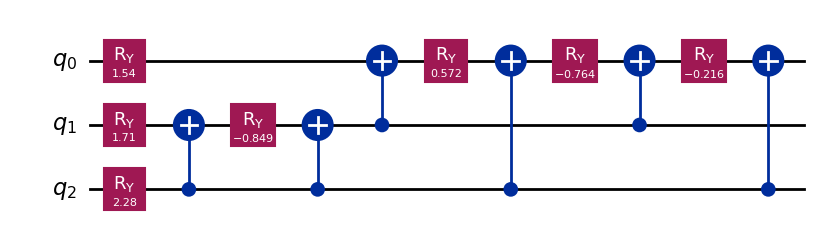

In [8]:
qc_basis.draw('mpl', filename='qiskit_3qubit.svg')

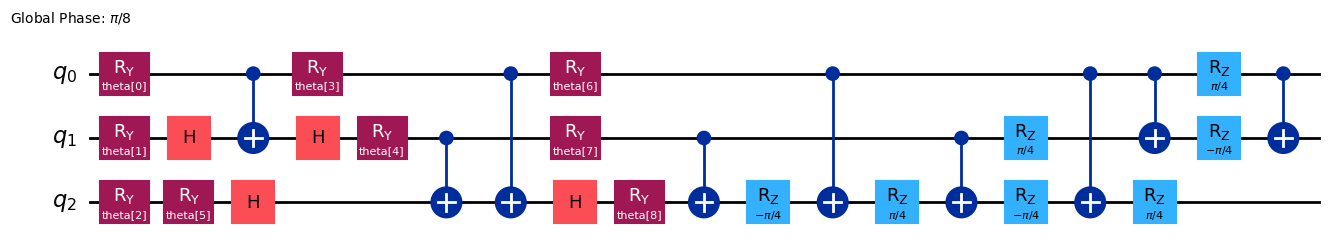

In [16]:
for n in [3]:
    from qiskit.providers.basic_provider import BasicProvider
    qc = ansatz.g2gn(n, 1)
    backend = BasicProvider().get_backend('basic_simulator')
    qc_basis = qiskit.transpile(qc, backend, 
        basis_gates=['h', 'cx',
                    'rx','ry','rz',
                    'crx','cry','crz'])

qc_basis.draw('mpl', filename='graph_3qubit.svg')


In [27]:
import numpy as np
import qiskit
import qiskit.quantum_info as qi
from qsee.core import state, metric, ansatz
from qsee.compilation.qcompilation import QuantumCompilation
from qsee.backend import utilities
qc = utilities.load_circuit(f'data/n={2},d={3},n_circuit=32,n_gen=30/best_circuit')
print(qc.count_ops())

OrderedDict([('h', 2), ('cry', 1), ('rz', 1), ('ry', 1)])


In [25]:
11+7+7+7

32

In [5]:
import numpy as np
import qiskit
import qiskit.quantum_info as qi
from qsee.core import state, metric, ansatz
from qsee.compilation.qcompilation import QuantumCompilation
from qsee.backend import utilities


n_test = 10

def multiple_compile(params):
    import concurrent.futures
    executor = concurrent.futures.ProcessPoolExecutor()
    results = executor.map(bypass_compile, params)
    return results

def graph(qc, random_state):
    compiler =  QuantumCompilation(
        u = qc,
        vdagger = state.specific(random_state).inverse(),
        metrics_func=[
            'loss_basic',
            'compilation_trace_fidelities'
        ]
    )
    compiler.fast_fit(100) 
    return compiler.metrics['compilation_trace_fidelities'][-1]

def bypass_compile(num_qubits):
    tests = []
    if num_qubits == 2:
        depth = [3]
    elif num_qubits == 3:
        depth = range(5,15)
    elif num_qubits == 4:
        depth = range(5, 30)
    elif num_qubits == 5:
        depth = range(13, 40)
    elif num_qubits == 6:
        depth = range(5, 40)
    index = 0
    for i in range(0, n_test):
        random_state = np.random.uniform(0, 2*np.pi, 2**num_qubits)
        random_state = random_state/np.linalg.norm(random_state)
        tests.append(np.array(random_state))
    while(True or index < len(depth)):
        fidelities = []
        qc = utilities.load_circuit(f'data/n={num_qubits},d={depth[index]},n_circuit=32,n_gen=40/best_circuit')
        for i in range(0, n_test):
            #print(tests[i])
            fidelities.append(graph(qc, tests[i]))
        print(f"n={num_qubits}, d={depth[index]}, f={np.mean(fidelities)}")
        if np.mean(fidelities) < 0.99:
            index += 1
            if index == len(depth):
                break
        else:
            break
bypass_compile(5)       
# if __name__ == '__main__':
#     ns = [2,3,4,5,6]
#     multiple_compile(ns)

n=5, d=13, f=0.9247292779535472
n=5, d=14, f=0.9069383205087442
n=5, d=15, f=0.9354641393972107
n=5, d=16, f=0.9469247066118223
n=5, d=17, f=0.9585038440158957
n=5, d=18, f=0.9518106628024208
n=5, d=19, f=0.9665552455005111
n=5, d=20, f=0.9693030542716837
n=5, d=21, f=0.9830484327961306
n=5, d=22, f=0.9754944530443019


In [ ]:
bypass_compile(6)  